# 보여줄 인사이트

1. 코로나 증가(배달 증가)
2. 연령별 배달 수 => 20~30대
3. 서울시 구별 연령대 비율 => 관악구
4. 서울시 구별 공원 수


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# 한글 폰트 설정
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
  fm.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 코로나 증가(배달 증가)
- kaggle 코로나 데이터
- 서울시 확진자 데이터


In [77]:
# 코로나 확진자 수 추이(월별)
# kaggle 데이터
corona = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/elice_team_project1/Time.csv')
corona.head()


,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [55]:
corona.tail()

,date,time,test,negative,confirmed,released,deceased
158,2020-06-26,0,1232315,1200885,12602,11172,282
159,2020-06-27,0,1243780,1211261,12653,11317,282
160,2020-06-28,0,1251695,1219975,12715,11364,282
161,2020-06-29,0,1259954,1228698,12757,11429,282
162,2020-06-30,0,1273766,1240157,12800,11537,282


In [56]:
corona.isnull().sum()

date         0
time         0
test         0
negative     0
confirmed    0
released     0
deceased     0
dtype: int64

In [57]:
corona['month'] = corona['date'].apply(lambda x: int(x[5:7]))


In [58]:
corona.head()

,date,time,test,negative,confirmed,released,deceased,month
0,2020-01-20,16,1,0,1,0,0,1
1,2020-01-21,16,1,0,1,0,0,1
2,2020-01-22,16,4,3,1,0,0,1
3,2020-01-23,16,22,21,1,0,0,1
4,2020-01-24,16,27,25,2,0,0,1


In [59]:
corona.tail()

,date,time,test,negative,confirmed,released,deceased,month
158,2020-06-26,0,1232315,1200885,12602,11172,282,6
159,2020-06-27,0,1243780,1211261,12653,11317,282,6
160,2020-06-28,0,1251695,1219975,12715,11364,282,6
161,2020-06-29,0,1259954,1228698,12757,11429,282,6
162,2020-06-30,0,1273766,1240157,12800,11537,282,6


In [60]:
month_patient = corona.groupby('month').sum().drop(columns=['time','test', 'negative', 'released', 'deceased'])
month_patient.head()

,confirmed
month,
1,40
2,12149
3,242847
4,315359
5,342230


<BarContainer object of 6 artists>

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


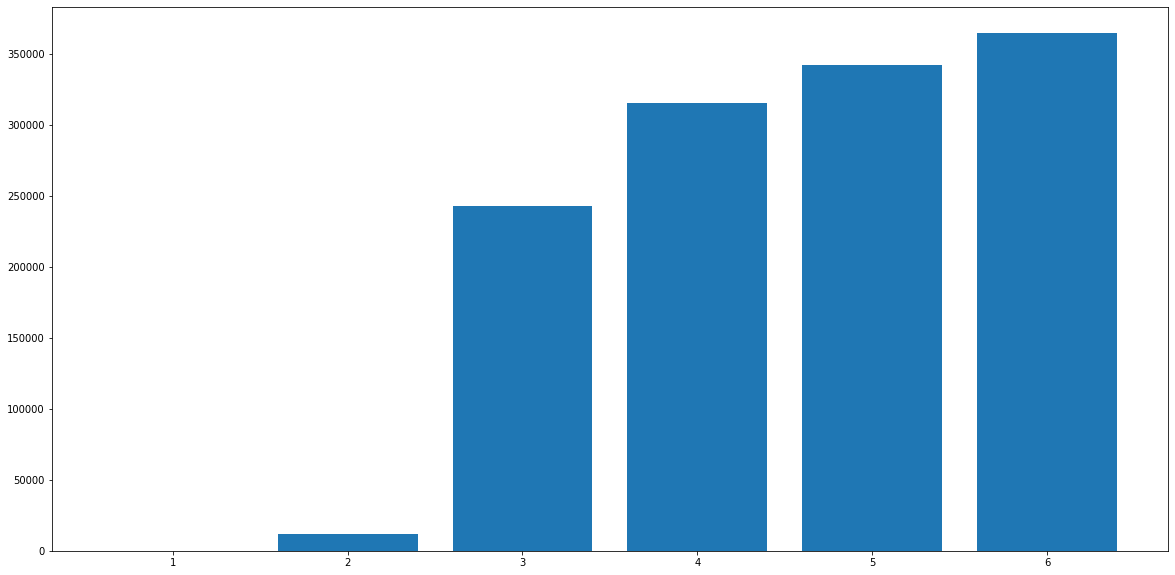

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(month_patient.index, month_patient['confirmed'])

In [145]:
# 서울시 확진자 수 데이터
corona_seoul = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/elice_team_project1/서울시 코로나19 확진자 현황.csv')
corona_seoul_confirmed = corona_seoul[['확진일']]
corona_seoul_confirmed['year'] = corona_seoul_confirmed.loc[:,'확진일'].apply(lambda x: x.split('-')[0])
corona_seoul_confirmed['month'] = corona_seoul_confirmed.loc[:,'확진일'].apply(lambda x: int(x.split('-')[1]))
corona_seoul_confirmed.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,확진일,year,month
0,2021-12-23,2021,12
1,2021-12-23,2021,12
2,2021-12-23,2021,12
3,2021-12-23,2021,12
4,2021-12-23,2021,12


In [155]:
corona_seoul_confirmed_monthly = corona_seoul_confirmed.groupby(['year','month']).count()
corona_seoul_confirmed_monthly.rename(columns={'확진일':'확진자 수'}, inplace=True)
corona_seoul_confirmed_monthly

확진자 수
year month       
2020 1          7
     2         80
     3        391
     4        156
     5        229
     6        459
     7        281
     8       2415
     9       1306
     10       733
     11      2904
     12     10432
2021 1       4878
     2       4060
     3       3897
     4       5803
     5       6030
     6       6258
     7      14504
     8      15193
     9      21382
     10     18840
     11     36267
     12     56609

In [151]:
corona_seoul_confirmed_monthly.loc['2020'].index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

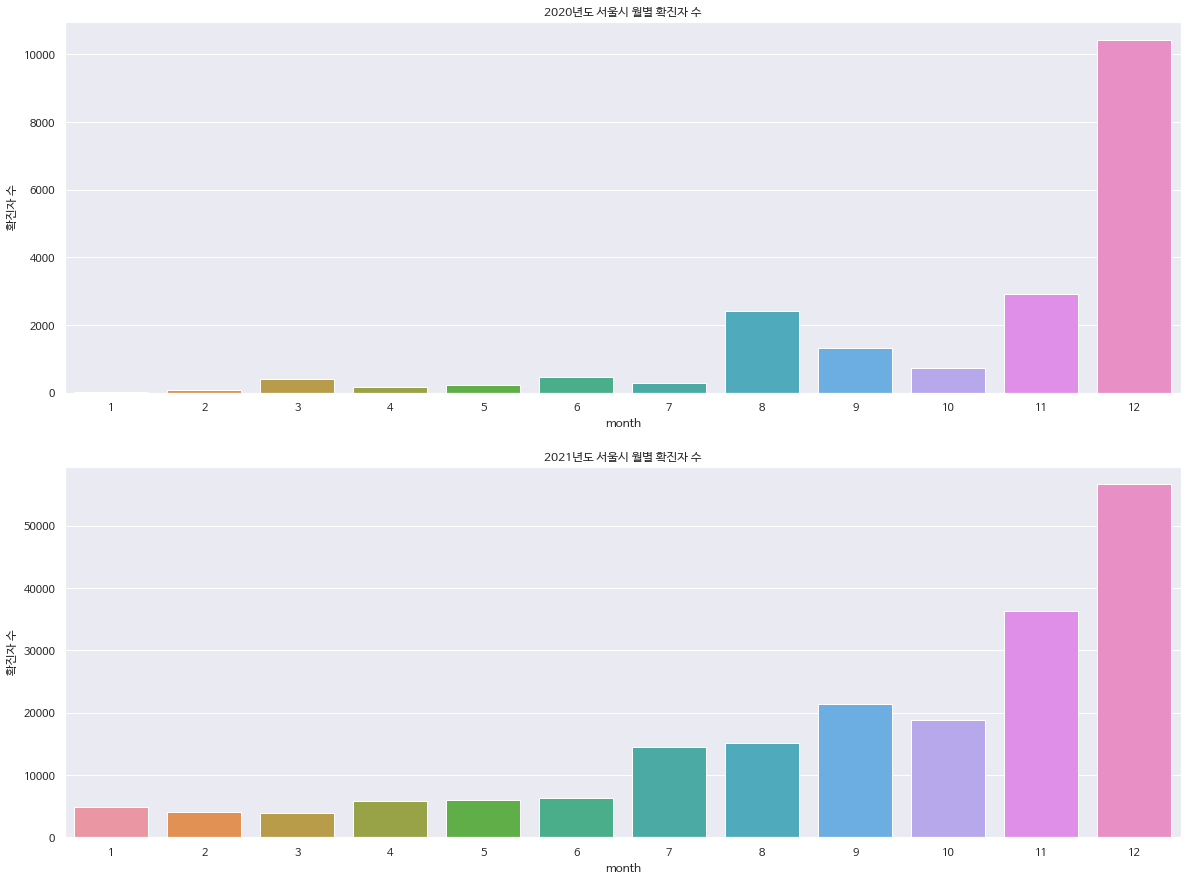

In [159]:
plt.figure(figsize=(20,15))

plt.subplot(211)
sns.barplot(data=corona_seoul_confirmed_monthly.loc['2020'], x=corona_seoul_confirmed_monthly.loc['2020'].index, y='확진자 수')
plt.title('2020년도 서울시 월별 확진자 수')

plt.subplot(212)
sns.barplot(data=corona_seoul_confirmed_monthly.loc['2021'], x=corona_seoul_confirmed_monthly.loc['2021'].index, y='확진자 수')
plt.title('2021년도 서울시 월별 확진자 수')

plt.show()

# 2. 연령별 배달 이용률
- 배달앱 이용 행태 자료
- opensurvey_trend 자료
- (추가 배달 데이터 자료) - 온라인쇼핑 이용특징

![local image](./연령별 배달앱 이용 비율.png)

# 3. 서울시 구별 20~30대 비율

In [62]:
# 서울시 구별 연령대 비율
seoul = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/elice_team_project1/연령별인구현황_월간.csv', encoding='cp949')
seoul = seoul[1:]
seoul.head()

,행정구역,2021년11월_계_총인구수,2021년11월_계_연령구간인구수,2021년11월_계_0~9세,2021년11월_계_10~19세,2021년11월_계_20~29세,2021년11월_계_30~39세,2021년11월_계_40~49세,2021년11월_계_50~59세,2021년11월_계_60~69세,2021년11월_계_70~79세,2021년11월_계_80~89세,2021년11월_계_90~99세,2021년11월_계_100세 이상,2021년11월_남_총인구수,2021년11월_남_연령구간인구수,2021년11월_남_0~9세,2021년11월_남_10~19세,2021년11월_남_20~29세,2021년11월_남_30~39세,2021년11월_남_40~49세,2021년11월_남_50~59세,2021년11월_남_60~69세,2021년11월_남_70~79세,2021년11월_남_80~89세,2021년11월_남_90~99세,2021년11월_남_100세 이상,2021년11월_여_총인구수,2021년11월_여_연령구간인구수,2021년11월_여_0~9세,2021년11월_여_10~19세,2021년11월_여_20~29세,2021년11월_여_30~39세,2021년11월_여_40~49세,2021년11월_여_50~59세,2021년11월_여_60~69세,2021년11월_여_70~79세,2021년11월_여_80~89세,2021년11월_여_90~99세,2021년11월_여_100세 이상
1,서울특별시 종로구 (1111000000),"145,073","145,073","7,039","10,465","22,896","19,473","21,065","24,982","20,362","11,659","6,146",944,42,"70,393","70,393","3,571","5,195","11,038","9,695","10,192","12,572","10,158","5,191","2,486",282,13,"74,680","74,680","3,468","5,270","11,858","9,778","10,873","12,410","10,204","6,468","3,660",662,29
2,서울특별시 중구 (1114000000),"122,673","122,673","6,331","6,508","18,301","19,935","17,460","20,067","18,047","10,236","4,936",804,48,"59,743","59,743","3,278","3,220","8,492","9,942","8,928","10,167","9,024","4,638","1,818",220,16,"62,930","62,930","3,053","3,288","9,809","9,993","8,532","9,900","9,023","5,598","3,118",584,32
3,서울특별시 용산구 (1117000000),"223,442","223,442","12,737","14,737","32,880","37,791","33,840","36,206","29,160","16,040","8,562","1,413",76,"107,486","107,486","6,560","7,460","15,498","18,714","16,680","17,877","14,053","7,014","3,183",425,22,"115,956","115,956","6,177","7,277","17,382","19,077","17,160","18,329","15,107","9,026","5,379",988,54
4,서울특별시 성동구 (1120000000),"286,599","286,599","19,307","18,960","43,701","46,926","43,412","46,281","37,744","20,106","8,963","1,146",53,"139,709","139,709","9,864","9,462","21,509","23,087","21,764","22,929","18,441","8,944","3,399",292,18,"146,890","146,890","9,443","9,498","22,192","23,839","21,648","23,352","19,303","11,162","5,564",854,35
5,서울특별시 광진구 (1121500000),"340,339","340,339","17,886","24,899","61,717","54,722","50,498","53,833","44,120","21,959","9,406","1,238",61,"164,212","164,212","9,204","12,614","28,888","27,139","24,872","26,381","20,977","10,046","3,745",330,16,"176,127","176,127","8,682","12,285","32,829","27,583","25,626","27,452","23,143","11,913","5,661",908,45


In [63]:
seoul_percent = seoul[['행정구역', '2021년11월_계_총인구수','2021년11월_계_20~29세','2021년11월_계_30~39세']]
seoul_percent['20~39세'] = seoul.loc[:,'2021년11월_계_30~39세'].apply(lambda x: int(x.replace(',',''))) + seoul.loc[:,'2021년11월_계_20~29세'].apply(lambda x: int(x.replace(',','')))
seoul_percent.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,행정구역,2021년11월_계_총인구수,2021년11월_계_20~29세,2021년11월_계_30~39세,20~39세
1,서울특별시 종로구 (1111000000),"145,073","22,896","19,473",42369
2,서울특별시 중구 (1114000000),"122,673","18,301","19,935",38236
3,서울특별시 용산구 (1117000000),"223,442","32,880","37,791",70671
4,서울특별시 성동구 (1120000000),"286,599","43,701","46,926",90627
5,서울특별시 광진구 (1121500000),"340,339","61,717","54,722",116439


In [88]:
seoul_percent['percent'] = seoul_percent.loc[:,'20~39세'] / seoul_percent.loc[:,'2021년11월_계_총인구수'].apply(lambda x: int(x.replace(',', '')))
seoul_percent['행정구역'] = seoul_percent['행정구역'].apply(lambda x: x.split()[1])
seoul_percent.head()

,행정구역,2021년11월_계_총인구수,2021년11월_계_20~29세,2021년11월_계_30~39세,20~39세,percent
21,관악구,"486,427","108,181","85,627",193808,0.398432
5,광진구,"340,339","61,717","54,722",116439,0.342127
19,영등포구,"377,048","58,755","69,331",128086,0.339707
14,마포구,"369,238","61,474","63,605",125079,0.338749
20,동작구,"386,051","65,156","60,911",126067,0.326555


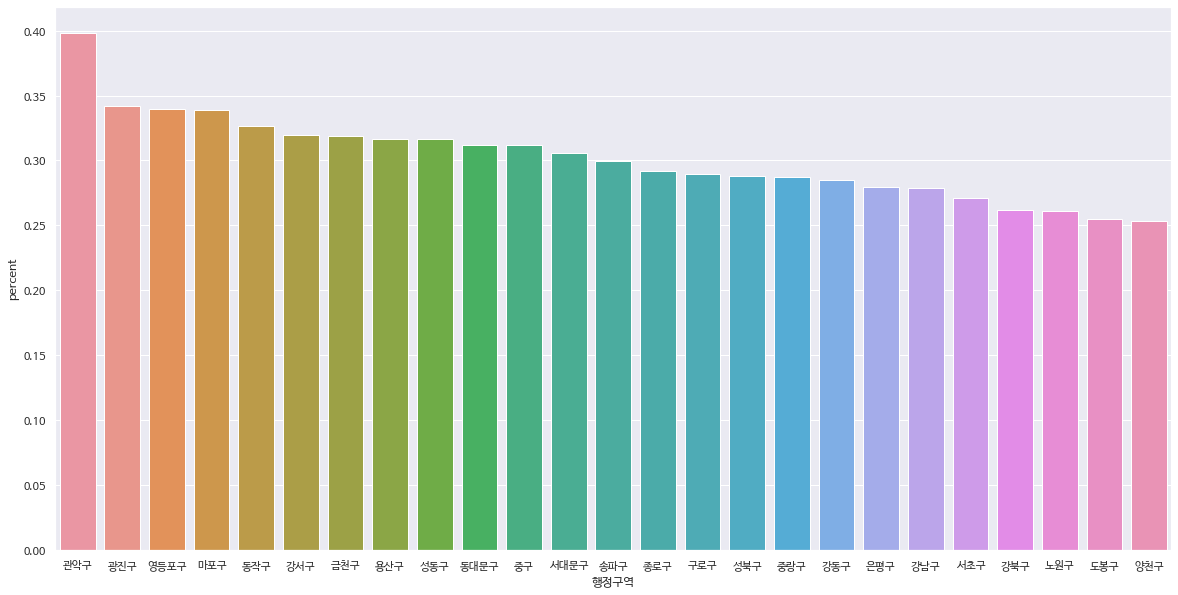

In [90]:
seoul_percent = seoul_percent.sort_values(by='percent',ascending=False)
plt.figure(figsize=(20,10))
ax = sns.barplot(data=seoul_percent, x='행정구역', y='percent', )
#plt.xticks(rotation=70)

# 4. 서울시 구별 공원 수 데이터

In [162]:
# 구별 공원수 데이터
rows = '강남구 광진구 서대문구  서초구 영등포구 은평구 종로구 중구 강북구 관악구 노원구 도봉구 동대문구 성북구 송파구 중랑구 구로구 금천구 동작구 마포구 성동구 양천구 용산구'.split()
columns = [int(x) for x in '162 69 76 193 73 101 29 15 36 87 408 21 60 49 44 31 75 59 8 42 37 76 34'.split()]
print(rows)
print(columns)


['강남구', '광진구', '서대문구', '서초구', '영등포구', '은평구', '종로구', '중구', '강북구', '관악구', '노원구', '도봉구', '동대문구', '성북구', '송파구', '중랑구', '구로구', '금천구', '동작구', '마포구', '성동구', '양천구', '용산구']
[162, 69, 76, 193, 73, 101, 29, 15, 36, 87, 408, 21, 60, 49, 44, 31, 75, 59, 8, 42, 37, 76, 34]


In [166]:
park_number = pd.DataFrame(index=rows)
park_number['공원수'] = columns
park_number.head()

,공원수
강남구,162
광진구,69
서대문구,76
서초구,193
영등포구,73
은평구,101
종로구,29
중구,15
강북구,36
관악구,87


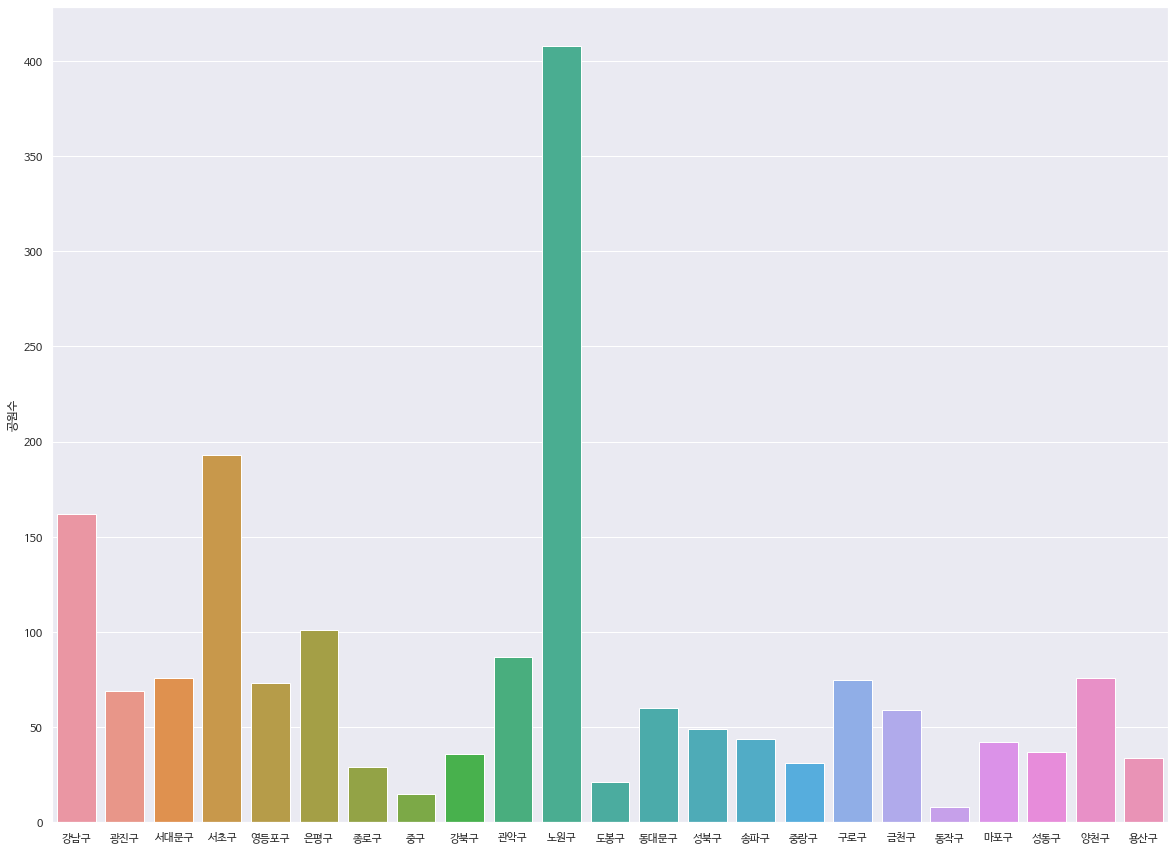

In [170]:
plt.figure(figsize=(20,15))
sns.barplot(data=park_number, x=park_number.index, y='공원수')